<a href="https://colab.research.google.com/github/prof4321/classificationApp/blob/main/complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Automatic Classification of Companies based on their descriptions using machine learning models



## Introduction

The objective of this MSc project is to create an automated company classification system that can accurately classify companies based on their descriptions using various machine learning techniques, such as data pre-processing, feature engineering, and model selection. The key benefit of automated classification is the ability to simplify and improve the classification process, resulting in increased efficiency and accuracy. Machine learning algorithms enable models to learn from past classification cases and improve over time, leading to greater accuracy and less time and effort spent analyzing company data.

Finally, we save the models and deploy them on streamlit application for easy interaction

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.2 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/MSc Project/Code/Automatic-Categorization-of-Companies-based-on-their-Names/dataset.csv"

Mounted at /content/drive


In [ ]:
# Data processing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# libraries for dataset preparation, feature engineering, model training
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import xgboost, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.multiclass import OneVsRestClassifier
import time
from sklearn.feature_selection import chi2
import os

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing related libraries
import string
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import gensim
import gensim.downloader as api
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Machine Learning
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import preprocessing as kprocessing
from tensorflow.keras import models, layers, optimizers

import transformers

# Visualization
import matplotlib
from matplotlib import pyplot as plt

# Various
from datetime import datetime

# Showing the versions used
print('Pandas version: {}'.format(pd.__version__))
print('Numpy version: {}'.format(np.__version__))
print('PyPlot version: {}'.format(matplotlib.__version__))
print('Scikit Learn version: {}'.format(sklearn.__version__))
print('Tensorflow version: {}'.format(tf.__version__))
print('Transformers version: {}'.format(transformers.__version__))
print('Regex version: {}'.format(re.__version__))
print('NLTK version: {}'.format(nltk.__version__))
print('Gensim version: {}'.format(gensim.__version__))
# set plot style
sns.set()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Pandas version: 1.5.3
Numpy version: 1.22.4
PyPlot version: 3.7.1
Scikit Learn version: 1.2.2
Tensorflow version: 2.12.0
Transformers version: 4.28.1
Regex version: 2.2.1
NLTK version: 3.8.1
Gensim version: 4.3.1


### Let's load the data and reformat before pre-processing

In [ ]:
# read the files and basic stats of the dataset
import pandas as pd

def read_file(file_path):
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
        # Get the number of rows and columns in the dataset
        df = df[['Category', 'meta_description']]
        df = df[pd.notnull(df['meta_description'])]
        # Renaming second column for a simpler name
        df.columns = ['category', 'text']
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path, header =1)
    # Identifying the first Tag for all rows
        first_tag = []
        for str in df['Industry Classifications']:
            first_tag.append(str.split(';')[0])
    # Number of unique and Total Records in First_Tag
        print ('Number of unique and Total Records in First_Tag:', len(set(first_tag)), len(first_tag))

        clean_first_tag = []
        for str in first_tag:
            clean_first_tag.append(str.replace("(Primary)",""))
        #Adding a new feature into the dataset
        df['Category'] = clean_first_tag
        df = df[['Category', 'Business Description']]
        df = df[pd.notnull(df['Business Description'])]
        # Renaming second column for a simpler name
        df.columns = ['category', 'text']
    else:
        raise ValueError('File must be either a CSV or XLSX file.')

    # Get basic statistics of the numerical columns in the dataset
    num_rows, num_cols = df.shape
    print(f'The dataset has {num_rows} rows and {num_cols} columns.')

    nume_cols = df.select_dtypes(include=['int', 'float']).columns
    if nume_cols == True:
      num_stats = df[nume_cols].describe()
      print(num_stats)
      # Get the correlation matrix of the numerical columns
      corr_matrix = df[nume_cols].corr()
      print('Correlation matrix:\n', corr_matrix)
    else:
      print('No numerical column')

    # Get the counts of unique values in a categorical column
    cat_cols = df.select_dtypes(include=['object']).columns
    cat_counts = df[cat_cols].value_counts()
    print(f'The {cat_cols} column has {len(cat_counts)}')

    return df


In [ ]:
df = read_file(path)
df.head()


The dataset has 66886 rows and 2 columns.
No numerical column
The Index(['category', 'text'], dtype='object') column has 65875


,category,text
0,Commercial Services & Supplies,"Providing quality, reliable full service resid..."
1,Healthcare,For the best value in Bakersfield skin care tr...
2,Commercial Services & Supplies,"Koops Overhead Doors specializes in the sales,..."
3,Healthcare,We would like to welcome you to Midtown Eyecar...
4,Commercial Services & Supplies,Repro Security provide a range of tailor made ...


In [ ]:
def perform_EDA(df, n):
    # Basic EDA to know the data more
    total_categories = len(df)
    split_by_category = df["category"].value_counts()
    nr_categories = len(df["category"].unique())
    category = df['category'][n]
    text = df['text'][n]

    return {
        "Total number of Categories": total_categories,
        "Split by category": split_by_category,
        "Number of categories": nr_categories,
        "Category": category,
        "Text": text
    }


In [ ]:
perform_EDA(df, 100)

Total number of Categories: 66886
----------------------------------------
Split by category:
Professional Services             6655
Healthcare                        6534
Corporate Services                6442
Financials                        6278
Commercial Services & Supplies    5856
Media, Marketing & Sales          5798
Transportation & Logistics        5727
Information Technology            5426
Energy & Utilities                5162
Consumer Staples                  4906
Industrials                       3073
Consumer Discretionary            2611
Materials                         2418
Name: category, dtype: int64
----------------------------------------
Number of categories: 13
Category:  Financials
----------------------------------------------------------------------------------------------------
Text:
We’ve moved! Miller Insurance Brokers are now part of Premier Insurance Centre. We still offer the great level of service you’ve come to expect of Miller Insurance, but now we

In [ ]:
# Percentage of Description with text
total = df['text'].notnull().sum()
round((total/len(df)*100),1)

100.0

# Pre-process the dataset

In [ ]:
# Reference: Text Classification with NLP: Tf-Idf vs Word2Vec vs BERT from Medium

# Use stopwords list from nltk (that is used in the function below)

lst_stopwords = nltk.corpus.stopwords.words("english")
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    # Clean (convert to lowercase and remove punctuations and characters and then strip)
    # The function is not optimized for speed but split into various steps for pedagogical purpose
    text = str(text).lower()
    text = text.strip()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize (convert from string to list)
    lst_text = text.split()
    # remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in lst_stopwords]

    # Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    # Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    # back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
# Let's apply this function to the whole corpus
df["text_clean"] = df["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df["text_clean"] = df["text_clean"].apply(lambda x: x.translate({ord(c):'' for c in "[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]"}))
# Let's look at the output
df.head()

,category,text,text_clean
0,Commercial Services & Supplies,"Providing quality, reliable full service resid...",providing quality reliable full service reside...
1,Healthcare,For the best value in Bakersfield skin care tr...,best value bakersfield skin care treatment med...
2,Commercial Services & Supplies,"Koops Overhead Doors specializes in the sales,...",koops overhead door specializes sale service r...
3,Healthcare,We would like to welcome you to Midtown Eyecar...,would like welcome midtown eyecare professiona...
4,Commercial Services & Supplies,Repro Security provide a range of tailor made ...,repro security provide range tailor made secur...


#### Count Vectors as features

In [ ]:
def filter_top_categories(df):
    # get the value counts of each category
    category_counts = df['category'].value_counts()

    # get the first 15 unique categories with the highest counts
    top_categories = category_counts[:15].index.tolist()

    # check if the number of unique categories is less than or equal to 15
    if category_counts.nunique() <= 15:
        # return all the dataframe
        filtered_df = df
    else:
        # return the filtered dataframe on the top 15 categories
        filtered_df = df[df['category'].isin(top_categories)]

    return filtered_df


In [ ]:
filtered_df = filter_top_categories(df)
# check the categories and their counter
from collections import Counter
Counter(filtered_df['category'])

Counter({'Commercial Services & Supplies': 5856,
         'Healthcare': 6534,
         'Materials': 2418,
         'Financials': 6278,
         'Energy & Utilities': 5162,
         'Professional Services': 6655,
         'Corporate Services': 6442,
         'Media, Marketing & Sales': 5798,
         'Information Technology': 5426,
         'Consumer Discretionary': 2611,
         'Industrials': 3073,
         'Transportation & Logistics': 5727,
         'Consumer Staples': 4906})

Now we need to represent each class as a number, for the machine to understand better.

In [ ]:
# Select only the needed columns
filtered_df = df[['category', 'text_clean']]
# Rename the second column for a simpler name
filtered_df.columns = ['category', 'description']

# Create a new column 'category_id' with encoded categories
filtered_df['category_id'] = filtered_df['category'].factorize()[0]
category_id_df = filtered_df[['category', 'category_id']].drop_duplicates()

# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

filtered_df.head(2)

,category,description,category_id
0,Commercial Services & Supplies,providing quality reliable full service reside...,0
1,Healthcare,best value bakersfield skin care treatment med...,1


The bar chart below shows the number of company's descriptions per category. It can be observed that most of descriptions are related to:
* Professional Services (9.95%)
* Healthcare (9.77%)
* Corporate Services (9.63%)

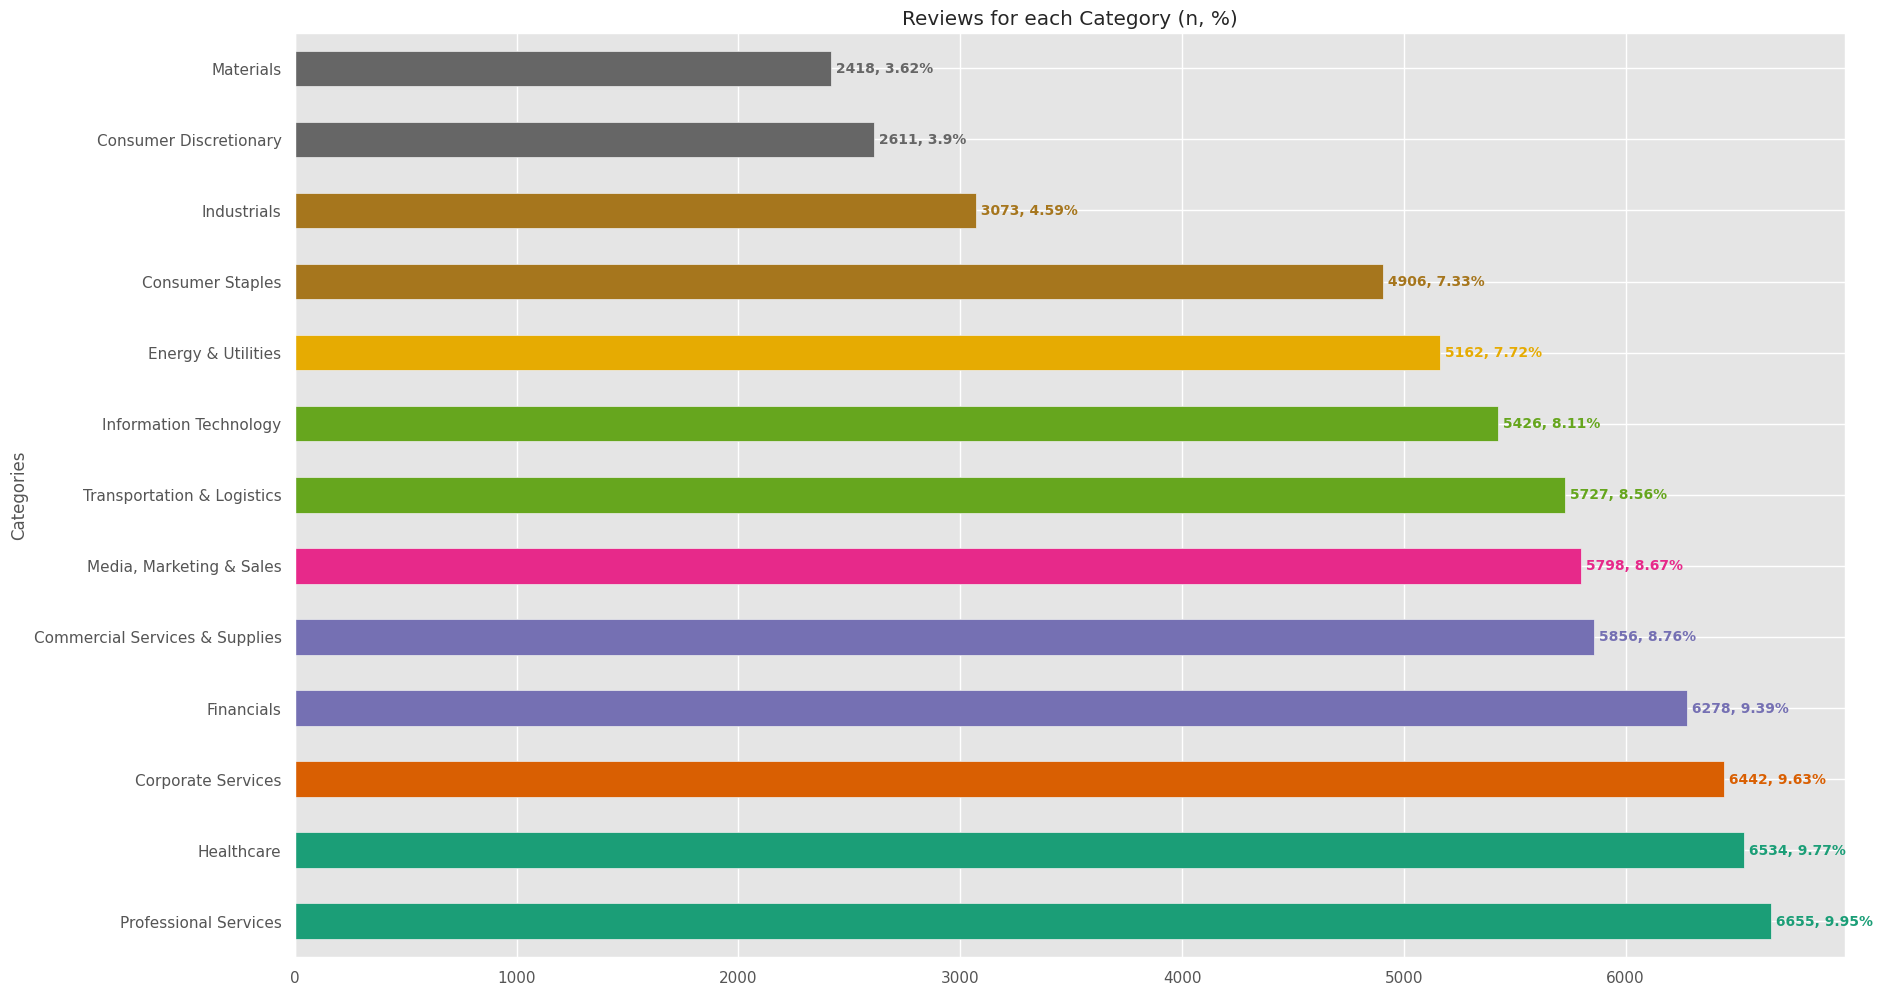

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')


num_classes = len(filtered_df ["category"].value_counts())

colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))
iter_color = iter(colors)

filtered_df ['category'].value_counts().plot.barh(title="Reviews for each Category (n, %)",
                                                 ylabel="Categories",
                                                 color=colors,
                                                 figsize=(20,12))

for i, v in enumerate(filtered_df ['category'].value_counts()):
  c = next(iter_color)
  plt.text(v, i,
           " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%",
           color=c,
           va='center',
           fontweight='bold')



<a id='pre'></a>
## Text Preprocessing

The text needs to be transformed to vectors so as the algorithms will be able make predictions. In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight to evaluate __how important a word is to a document in a collection of documents__.

After removing __punctuation__ and __lower casing__ the words, importance of a word is determined in terms of its frequency.

In [ ]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

# We transform each description into a vector
features = tfidf.fit_transform(filtered_df.description).toarray()

labels = filtered_df.category_id

print("Each of the %d companies is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 66886 companies is represented by 37689 features (TF-IDF score of unigrams and bigrams)


In [ ]:
# Finding the three most correlated terms with each of the company categories
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2),
                        stop_words='english')

# We transform each description into a vector
features = tfidf.fit_transform(filtered_df.description).toarray()

labels = filtered_df.category_id
N = 3
# Loop through the categories and find the most correlated terms
for Category, category_id in sorted(category_to_id.items()):
    # Calculate the chi-squared test statistic for each term
    chi2score = chi2(features, labels == category_id)[0]
    # Sort the indices in decreasing order of chi-squared test statistic
    indices = np.argsort(chi2score)[::-1]
    # Get the feature names in decreasing order of chi-squared test statistic
    feature_names = np.array(tfidf.get_feature_names_out())[indices]
    # Get the top N correlated terms
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1][:N]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2][:N]
    # Print the most correlated unigrams and bigrams for each category
    print("\n==> %s:" %(Category))
    print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
    print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))




==> Commercial Services & Supplies:
  * Most Correlated Unigrams are: security, furniture, electrical
  * Most Correlated Bigrams are: electrical service, office furniture, electrical contractor

==> Consumer Discretionary:
  * Most Correlated Unigrams are: carpet, apparel, education
  * Most Correlated Bigrams are: higher education, carpet cleaning, appliance repair

==> Consumer Staples:
  * Most Correlated Unigrams are: beer, coffee, food
  * Most Correlated Bigrams are: specialty coffee, food service, coffee roaster

==> Corporate Services:
  * Most Correlated Unigrams are: recruitment, property, hotel
  * Most Correlated Bigrams are: recruitment agency, real estate, property management

==> Energy & Utilities:
  * Most Correlated Unigrams are: oil, solar, energy
  * Most Correlated Bigrams are: solar panel, renewable energy, oil gas

==> Financials:
  * Most Correlated Unigrams are: mortgage, financial, insurance
  * Most Correlated Bigrams are: business insurance, independent in

The pre-processing makes the text more suitable to read and to feed into a machine for modelling!

### Split into Train and Test data

To examine the algorithm's accuracy, we must divide the dataset into a training dataset (to train the model) and a test dataset (to assess the model). This is accomplished using normal tools. We divided the dataset 75/25, as is common for relatively size datasets.

To conform with machine learning standard notations, we rename the input (description) to X and the output (category) to y.

The dataset is not that big. As a result, it makes sense to generate training/test sets that are representative of the dataset. We do this by dividing the datasets so that the amount of datasets in each group is similar.

In [ ]:
# Renaming, Input -> X, Output -> y
X = filtered_df['description']
y = filtered_df['category']

In [ ]:
# Split into Training and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=filtered_df['category'])

Take a look at the split by category: you can see that both the training and test sets are reflective of the dataset.


In [ ]:
y_train.value_counts()/y.value_counts()

Professional Services             0.749962
Healthcare                        0.749923
Corporate Services                0.749922
Financials                        0.749920
Commercial Services & Supplies    0.750000
Media, Marketing & Sales          0.749914
Transportation & Logistics        0.749956
Information Technology            0.750092
Energy & Utilities                0.750097
Consumer Staples                  0.750102
Industrials                       0.750081
Consumer Discretionary            0.749904
Materials                         0.750207
Name: category, dtype: float64

## TF-IDF Model





The TF-IDF model (Term Frequency - Inverse Document Frequency) models a text by measuring how frequently a single word (called uni-gram), a combination of two words (called bi-gram), or even more (called n-gram) appears in the text. As a result, the "term frequency" is created. It is then divided by the document frequency, which is the frequency with which a term appears across all entries (i.e. all documents). The final step allows you to distinguish between underweight words that appear frequently and overweight words that appear infrequently.

The TF-IDF model does not consider word order (save for two consecutive words) and hence belongs to the "Bag of Words" family of models. We will see later models that take word order into account.

To convert text to this format, we "vectorize" it. When we do this, we define the vocabulary size (i.e. the total number of words considered) as well as the n-gram range. Then, a word (or word pair in the case of bi-grams) is represented by a vector of the same size as the vocabulary, with values in just one element and zero in the others. This is referred to as a one-hot vector.

We fit the vectorizer to the complete training set once we initialised it.

We also save all the models for reusability and show the comparison, we also look at the training time

Let's get started on the model. After converting an entry to a vector with the vectorizer, we apply an error-minimizing technique, which means that the output predicted by the model y(X) should be as close to the label y as possible.

We employ logistics regression because it performed better than other models (such as SVM, Naive Bayes, etc.) used.

We build the model as a pipeline, consisting of:
- vectorization
- classifier

We fit the model to the training data


<a id='ml'></a>
## Multi-Classification models

The classification models evaluated are:
* Random Forest
* Linear Support Vector Machine
* Multinomial Naive Bayes
* Logistic Regression.

In [ ]:
import pickle
# Initizalize the vectorizer with max nr words and ngrams (1: single words, 2: two words in a row)
vectorizer_tfidf = TfidfVectorizer(max_features=15000, ngram_range=(1,2))

# Fit the vectorizer to the training data
vectorizer_tfidf.fit(X_train)

# Define classifiers
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)
svm = LinearSVC()
nb = MultinomialNB()
lr = LogisticRegression(solver='lbfgs', class_weight='balanced', max_iter=10000)

# Define pipelines
model_rf = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", rf)])
model_svm = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", svm)])
model_nb = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", nb)])
model_lr = Pipeline([("vectorizer", vectorizer_tfidf), ("classifier", lr)])

# Train models
models = [model_rf, model_svm, model_nb, model_lr]
model_names = ['Random Forest', 'LinearSVC', 'MultinomialNB', 'Logistic Regression']

mean_accuracies = []
training_times = []
best_accuracy = 0
best_model_name = ""
best_model_training_time = 0

for i, model in enumerate(models):
    start_time = datetime.now()
    model.fit(X_train, y_train)
    end_time = datetime.now()

    training_time = (end_time - start_time).total_seconds()
    accuracy = model.score(X_test, y_test)

    mean_accuracies.append(accuracy)
    training_times.append(training_time)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = model_names[i]
        best_model_training_time = training_time

    print(f"{model_names[i]} Model\nTraining time: {training_time:.2f}s\nAccuracy: {accuracy:.4f}\n")

    # Save the model to a file
    with open(f"{model_names[i]}.pkl", "wb") as f:
        pickle.dump(model, f)
# Create a DataFrame to display the data in a table
results_df = pd.DataFrame({
    "Model Name": model_names,
    "Model Accuracy": mean_accuracies,
    "Training Time (s)": training_times
})

# Print the results table
results_df

# Print the training time for the best model
print(f"Training time for the best model ({best_model_name}): {best_model_training_time:.2f}s")



Random Forest Model
Training time: 7.25s
Accuracy: 0.5767

LinearSVC Model
Training time: 9.22s
Accuracy: 0.8362

MultinomialNB Model
Training time: 5.73s
Accuracy: 0.8119

Logistic Regression Model
Training time: 32.37s
Accuracy: 0.8387

Training time for the best model (Logistic Regression): 32.37s


<a id='sum'></a>
## Comparison of model performance

The best mean acuracy was obtained with Logistic Regression Model, closely followed by LinearSVC with a less training time

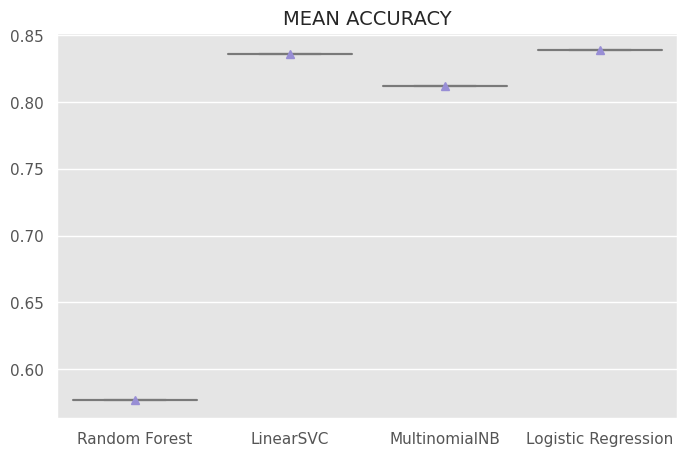

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x=model_names, y=mean_accuracies,
            data=results_df,
            color='lightblue',
            showmeans=True)
plt.title("MEAN ACCURACY", size=14);

<a id='ev'></a>
## Model Evaluation

We evaluate the model's accuracy after training by comparing the model's predictions to the labels for both the training and test data. We compare it for both because the difference in accuracies is an important indicator of overfitting (the model is overly fitted to the training data).


In [ ]:
training_time_tfidf = best_model_training_time
print(training_time_tfidf)

32.369445


In [ ]:
# Load the saved model object from disk

with open(f"Logistic Regression.pkl", "rb") as f:
    best_model = pickle.load(f)

predicted_train_tfidf = best_model.predict(X_train)
accuracy_train_tfidf = accuracy_score(y_train, predicted_train_tfidf)
print('Accuracy Training data: {:.1%}'.format(accuracy_train_tfidf))

predicted_test_tfidf = best_model.predict(X_test)
accuracy_test_tfidf = accuracy_score(y_test, predicted_test_tfidf)
accuracy_tfidf = accuracy_test_tfidf
print('Accuracy Test data: {:.1%}'.format(accuracy_test_tfidf))


Accuracy Training data: 89.1%
Accuracy Test data: 83.9%


We achieve incredible precision! Because the model's training and test accuracy are comparable, it is not overfitted. If the model was overfitted, it might be improved by modifying the regularization, which comes with the sci-kit logistic regression model by default. LR's converge fast and reach the "exact" solution, however once a model is optimized, there is little room for improvement.


With other models, we can see the best parameters to achieving the best accuracy

<a id='m'></a>
### Precision, Recall, F1-score

In [ ]:
# Classification report
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, predicted_test_tfidf,
                                    target_names= filtered_df['category'].unique()))

				CLASSIFICATIION METRICS

                                precision    recall  f1-score   support

Commercial Services & Supplies       0.82      0.82      0.82      1464
                    Healthcare       0.71      0.83      0.76       653
                     Materials       0.82      0.88      0.85      1226
                    Financials       0.86      0.83      0.84      1611
            Energy & Utilities       0.88      0.84      0.86      1290
         Professional Services       0.93      0.85      0.89      1570
            Corporate Services       0.92      0.89      0.90      1634
      Media, Marketing & Sales       0.73      0.80      0.76       768
        Information Technology       0.76      0.79      0.78      1356
        Consumer Discretionary       0.78      0.82      0.80       604
                   Industrials       0.85      0.84      0.84      1450
    Transportation & Logistics       0.86      0.84      0.85      1664
              Consumer Staples    

It is possible to observe that the classes with more support (number of occurrences) tend to have a better f1-score. This is because the algorithm was trained with more data.<br><br>
The classes that can be classified with more precision are __‘Professional Services'__, __‘Corporate Services’__, __‘Energy & Utilities’__, __and__, __'Financials’__.

<a id='cm'></a>
### Confusion Matrix

A Confusion Matrix is a table in which the rows are the actual class and the columns are the predicted class.

If we had a perfect model that always properly classified a new category, the confusion matrix would only contain values in the diagonal (where predicted label = actual label).


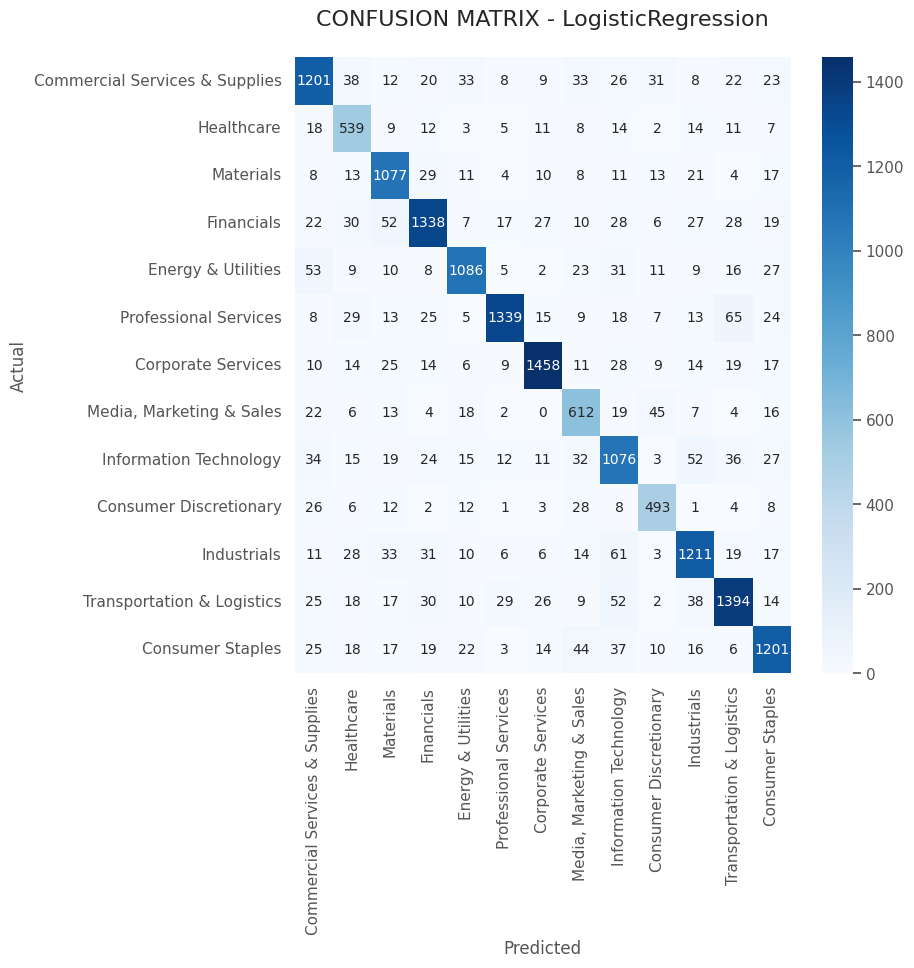

In [ ]:
conf_mat = confusion_matrix(y_test, predicted_test_tfidf)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.category.values,
            yticklabels=category_id_df.category.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LogisticRegression\n", size=16);

In general, the confusion matrix appears to be in good shape (clean diagonal representing correct classifications). Nonetheless, there are instances where the descriptions were categorised incorrectly.

#### Misclassification of descriptions
Let's take a look at the cases that were categorised incorrectly.


In [ ]:
indices_test = X_test.index
for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] <= 10:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual],
                                                           id_to_category[predicted],
                                                           conf_mat[actual, predicted]))

      # display(filtered_df.loc[indices_test[(y_test == actual) & (predicted_test_tfidf == predicted)]][['category',
      #                                                           'description']])
      print('')

'Materials' predicted as 'Commercial Services & Supplies' : 8 examples.

'Professional Services' predicted as 'Commercial Services & Supplies' : 8 examples.

'Corporate Services' predicted as 'Commercial Services & Supplies' : 10 examples.

'Energy & Utilities' predicted as 'Healthcare' : 9 examples.

'Media, Marketing & Sales' predicted as 'Healthcare' : 6 examples.

'Consumer Discretionary' predicted as 'Healthcare' : 6 examples.

'Healthcare' predicted as 'Materials' : 9 examples.

'Energy & Utilities' predicted as 'Materials' : 10 examples.

'Energy & Utilities' predicted as 'Financials' : 8 examples.

'Media, Marketing & Sales' predicted as 'Financials' : 4 examples.

'Consumer Discretionary' predicted as 'Financials' : 2 examples.

'Healthcare' predicted as 'Energy & Utilities' : 3 examples.

'Financials' predicted as 'Energy & Utilities' : 7 examples.

'Professional Services' predicted as 'Energy & Utilities' : 5 examples.

'Corporate Services' predicted as 'Energy & Utilities' 

#### Most correlated terms with each category

In [ ]:
N = 4
for Category, category_id in sorted(category_to_id.items()):
  indices = np.argsort(best_model.named_steps['classifier'].coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  # print("\n==> %s:" %(Category))
  # print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  # print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))




### Model Interpretation

The linear algorithm has the advantage of being simple to interpret. Because each model parameter corresponds to a word, knowing which parameters count the most naturally tells us which words count the most.

Let's take a deeper look at the model's parameters, extracting the top 10 terms from each category:


In [ ]:
print('Classes of the model: ',lr.classes_)
print(80*'-')
print('Shape of the coefficients of the model (categories x vocabulary size): ',lr.coef_.shape)
print(80*'-')
NN = 10
# Get the 10 (here: NN, which you can adjust yourself) ids of the words with highest weights per category
top_words = np.argsort(lr.coef_,axis=1)[:,-NN:]

# Get the vocabulary of the model (mapping of words to ids):
voc = vectorizer_tfidf.vocabulary_
# Get the inverse vocabulary to map the ids of the words to the words:
inv_voc = {v: k for k, v in voc.items()}

# Get for each category (=class) the top ten words
for n, w in enumerate(lr.classes_):
    t = w + ': '
    for i in range(NN):
        t += inv_voc[top_words[n,i]]
        if i!=NN:
            t+=', '
    print(t)
    print(80*'-')

Classes of the model:  ['Commercial Services & Supplies' 'Consumer Discretionary'
 'Consumer Staples' 'Corporate Services' 'Energy & Utilities' 'Financials'
 'Healthcare' 'Industrials' 'Information Technology' 'Materials'
 'Media, Marketing & Sales' 'Professional Services'
 'Transportation & Logistics']
--------------------------------------------------------------------------------
Shape of the coefficients of the model (categories x vocabulary size):  (13, 15000)
--------------------------------------------------------------------------------
Commercial Services & Supplies: heating, office, cleaning, contracting, electric, contractor, electrical, security, environmental, furniture, 
--------------------------------------------------------------------------------
Consumer Discretionary: clothing, fabric, student, school, educational, appliance, carpet, textile, apparel, education, 
--------------------------------------------------------------------------------
Consumer Staples: fruit

The model seems to be okay!

<a id='pred'></a>
## Predictions

Now let's make a few predictions on unseen data.<br>

In [ ]:
df_test = read_file(path)
# Let's apply this function to the whole corpus
df_test["clean"] = df_test["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords=lst_stopwords))
df_test["clean"] = df_test["clean"].apply(lambda x: x.translate({ord(c):'' for c in "[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]"}))
# Let's look at the output
df_test.head(2)

The dataset has 66886 rows and 2 columns.
No numerical column
The Index(['category', 'text'], dtype='object') column has 65875


,category,text,clean
0,Commercial Services & Supplies,"Providing quality, reliable full service resid...",providing quality reliable full service reside...
1,Healthcare,For the best value in Bakersfield skin care tr...,best value bakersfield skin care treatment med...


In [ ]:
filtered_df = filter_top_categories(df_test)

# selecting only the needed columns
filtered_df = filtered_df[['category', 'clean']]
# Renaming second column for a simpler name
filtered_df.columns = ['category', 'description']

# Create a new column 'category_id' with encoded categories
filtered_df['category_id'] = filtered_df['category'].factorize()[0]
category_id_df = filtered_df[['category', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'category']].values)

# New dataframe
filtered_df.head()

,category,description,category_id
0,Commercial Services & Supplies,providing quality reliable full service reside...,0
1,Healthcare,best value bakersfield skin care treatment med...,1
2,Commercial Services & Supplies,koops overhead door specializes sale service r...,0
3,Healthcare,would like welcome midtown eyecare professiona...,1
4,Commercial Services & Supplies,repro security provide range tailor made secur...,0


In [ ]:
# let's look at a specific example to get a concrete impression of company's description
# You can adjust n:
n=100
print('Category: ',filtered_df['category'][n])
#print(100*'-')
#print('Text:')
new_description =filtered_df['description'][n]
new_description

Category:  Financials


'weve moved miller insurance broker part premier insurance centre still offer great level service youve come expect miller insurance bring customer much wider offering service please dont hesitate contact'

In [ ]:
#new_description = "chequamegon food coop memberowned corporation ashland wisconsin speciality include fresh local organic natural food"
# let's look at a specific example to get a concrete impression of company's description
# You can adjust n:
n=100
print('Category: ',filtered_df['category'][n])
#print(100*'-')
#print('Text:')
new_description =filtered_df['description'][n]
new_description
predicted_category = best_model.predict([new_description])[0]
# Find the row in the DataFrame that matches the predicted category
filtered_df[filtered_df['description'] == new_description]

Financials


Let's see what is the classification that our model gives to this new description.

In [ ]:
# Find the row in the DataFrame that matches the predicted category
filtered_df[filtered_df['description'] == new_description]

,category,description,category_id
100,Financials,weve moved miller insurance broker part premie...,3


In [ ]:
#new_description_2 = "VCF pays 100% of what the State of Illinois owes you. A Qualified Purchaser in the State of Illinois' Vendor Payment Program and Vendor Support Initiative."
n=200
print('Category: ',filtered_df['category'][n])
#print(100*'-')
#print('Text:')
new_description_2 =filtered_df['description'][n]
new_description_2


Category:  Commercial Services & Supplies


'florence electric offer consulting engineering design installation team electrical building technology market throughout new england'

In [ ]:
predictions_2 = best_model.predict([new_description_2])[0]
print(predictions_2)

Commercial Services & Supplies


In [ ]:
# Find the row in the DataFrame that matches the predicted category
filtered_df[filtered_df['description'] == new_description_2]

,category,description,category_id
200,Commercial Services & Supplies,florence electric offer consulting engineering...,0


In [ ]:
new_descriptions = [
    "VCF pays 100% of what the State of Illinois owes you. A Qualified Purchaser in the State of Illinois' Vendor Payment Program and Vendor Support Initiative.",
    "Lorem ipsum dolor sit amet, consectetur adipiscing elit.",
    "Koops Overhead Doors, Albany Garage Doors, Troy Garage Doors, Capital District Garage Doors, Clifton Park Garage Doors, Capital District Garage Door Repair, Albany Garage Door Repair."
]
predictions = best_model.predict(new_descriptions)
print(predictions)


['Financials' 'Consumer Staples' 'Commercial Services & Supplies']


In [ ]:
#new_description_2 = "VCF pays 100% of what the State of Illinois owes you. A Qualified Purchaser in the State of Illinois' Vendor Payment Program and Vendor Support Initiative."
n=1000
print('Category: ',filtered_df['category'][n])

new_description_3 =filtered_df['description'][n]
new_description_3


Category:  Commercial Services & Supplies


'contract electrician retford nottingham doncaster worksop'

In [ ]:
# Find the row in the DataFrame that matches the predicted category
filtered_df[filtered_df['description'] == new_description_3]

,category,description,category_id
1000,Commercial Services & Supplies,contract electrician retford nottingham doncas...,0


### Deep Learning - RNN

Words in a text occur in a specific order. Recurrent Neural Networks (RNN) are models that consider word order by processing words sequentially as they appear in the text. It was discovered that RNNs with no "internal memory" had a limitation in terms of "how far they can remember" the influence of word correlations. Long Short Term Memory (LSTM) cells replaced regular RNNs in Machine Learning to mitigate this. Internal variables in LSTM cells serve as memory. It has slightly greater computational expenses, which are usually acceptable.

We use Word2Vec to develop this model, which makes use of word embeddings. This is a technique that was first published in 2013 [1] and has had a significant impact on NLP. It entails describing a word with a vector of a specific size (usually 100 or 300). The vector for a given word is defined by its context inside texts (i.e., words on its left and right - N words on the left, N words on the right, N commonly being 5). Word embeddings are typically trained using massive text corpora. Word2Vec was trained on millions of Google News articles, whereas GloVe, a comparable technique, was trained on Wikipedia. Word2Vec was trained on millions of Google News articles, whereas GloVe, a comparable technique, was trained on Wikipedia. Words having similar meanings (synonyms) are usually near together in this word area. The representation is "dense" in comparison to the "sparse" one-hot vector representation.

The sequential approach of RNN allows for the consideration of word order, but it also slows down training because a sequential approach by design cannot be handled by parallel computing.

The training and test data are defined differently than for TF-IDF: we will use unprocessed text. Because of technical reasons, the labelling cannot be handled as text and must be turned into a one-hot vector. The data was then divided into training and test sets, as with TF-IDF.


In [ ]:
# Renaming, Input -> X, Output -> y
X_tf = df['text']
y_tf_class = df['category']

# Convert labels into a one-hot vector of size 13 (the number of distinct labels)
lab = LabelBinarizer()
lab.fit(y_tf_class)
y_tf = lab.transform(y_tf_class)

# Example (you can modify n)
n=100
print('Coding of labels into a one-hot vector: ' + y_tf_class[n] + ' is ', y_tf[n])

# Split into training and test data
X_tf_train, X_tf_test, y_tf_train, y_tf_test = train_test_split(X_tf, y_tf, test_size=0.25, random_state=42, stratify=df['category'])

Coding of labels into a one-hot vector: Financials is  [1 0 0 0 0 0 0 0 0 0 0 0 0]


The text, which is a series of words, must be translated to a series of numbers. TensorFlow's tokenizer is used to tokenize the text.

We fit the tokenizer to the training data after initialising it.


In [ ]:
corpus = X_tf_train
max_words = 15000
tokenizer = kprocessing.text.Tokenizer(lower=True, split=' ', num_words=max_words, oov_token="<pad>", filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(corpus)
voc = tokenizer.word_index
reverse_voc = dict([(value, key) for (key, value) in voc.items()])

Let's utilise the tokenizer to turn the training data (a string of words) into a string of numbers that represent the words. We then pad sequences with TensorFlow's pad_sequences function. We set a length limit for the sequences. Any text that has more words than allowed will be cut.

After processing the training data, we examine its shape and explain it with an example.


In [ ]:
max_len = 200

sequences = tokenizer.texts_to_sequences(X_tf_train)
X_tf_train_seq = kprocessing.sequence.pad_sequences(sequences, maxlen=max_len)

# Apply the same to test data
X_tf_test_seq = kprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences(X_tf_test), maxlen=max_len)

n=10 # You can adjust n
print('Shape: ',X_tf_train_seq.shape)
print(100*'-')
print('Example: ',X_tf_train_seq[n,:])

Shape:  (46820, 200)
----------------------------------------------------------------------------------------------------
Example:  [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 

Each word is now assigned a number (an index). We want to represent it with the best vector possible, based on previously learnt knowledge.

This is accomplished by the use of Word2Vec, as previously mentioned. We will not train this word representation ourselves, but will instead download an existing representation from the library gensim. This could take some time. Once we have this word representation, we will map it to our tokenization.


In [ ]:
# This may take several minutes
w2v = api.load("word2vec-google-news-300")
# Example of a word representation:
w2v['hello'].shape

[==================================================] 100.0% 1662.8/1662.8MB downloaded


(300,)

In [ ]:
# Build weights of the embbeddings matrix using w2v
emb_matrix=np.zeros((max_words+1, 300))
for i in range(max_words):
    w = reverse_voc[i+1]
    if w in w2v:
        emb_matrix[i+1,:] = w2v[w]
emb_size = emb_matrix.shape[1]

We develop the model after we have a word representation. We use:
- Input layer: to inform the model about the expected input format, so that the model knows what to expect.
- Embedding: Using the downloaded Word2Vec matrix, we turn the input (a sequence of word indices) into a sequence of embedded words (a sequence of vectors of size 300).
- LSTM layer: To have the most information available, we employ an LSTM layer that moves in both directions (ahead and backward). This layer's output (which is pushed to the next layer) is the output of the previous word (on the right for the forward LSTM and on the left for the reverse LSTM). We set the output vector size to 15 (which is fairly arbitrary). We get a vector of size 30 by combining both outputs (forward and backward).
- A dropout layer is used for regularisation.
- Dense layer (with relu activation function and 64 neurons): to solve the classification problem.
- Dense layer (with softmax activation function): for each label's probability distribution
We ran the model through the Adam optimizer, where we experimented with the hyper-parameters. Based on the recommendations of the initial dropout article (2014) [2|, we increase the learning rate compared to TensorFlow's default values.


In [ ]:
from tensorflow.keras import layers, models, optimizers
nr_categories = len(df["category"].unique())
input_ = layers.Input(shape = X_tf_train_seq[0,:].shape,name='input')
# Embedding layer (voc size plus un ("UNK", word with index 0)), using the pre-trained emb_matrix obtained from Word2Vec
x = layers.Embedding(max_words+1,emb_size,weights=[emb_matrix],trainable=False, name='embedding')(input_)
x = layers.Bidirectional(layers.LSTM(15,dropout=0.2),name='bidirectional-lstm')(x) # LSTM layer
x = layers.Dropout(0.2, name='dropout')(x)
x = layers.Dense(64, activation='relu', name='dense')(x)
output = layers.Dense(nr_categories,activation='softmax', name='classification')(x)

model = models.Model(input_, output)

opt = optimizers.Adam(learning_rate=0.01, beta_1=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])

Let's view our model:

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 200)]             0         
                                                                 
 embedding (Embedding)       (None, 200, 300)          4500300   
                                                                 
 bidirectional-lstm (Bidirec  (None, 30)               37920     
 tional)                                                         
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense (Dense)               (None, 64)                1984      
                                                                 
 classification (Dense)      (None, 13)                845       
                                                             

It is now time to train the model! We train it during ten epochs. When we train the model, we obtain valuable information from the history object, which we present after the training.


In [ ]:
start_time = datetime.now()
history = model.fit(X_tf_train_seq, y_tf_train, batch_size=64, shuffle=True, epochs=10, validation_data=(X_tf_test_seq, y_tf_test))
end_time = datetime.now()

training_time_rnn = (end_time - start_time).total_seconds()

Epoch 1/10
732/732 [==============================] - 151s 199ms/step - loss: 0.9828 - accuracy: 0.7157 - val_loss: 0.6491 - val_accuracy: 0.8207
Epoch 2/10
732/732 [==============================] - 141s 193ms/step - loss: 0.7126 - accuracy: 0.8075 - val_loss: 0.6311 - val_accuracy: 0.8262
Epoch 3/10
732/732 [==============================] - 144s 196ms/step - loss: 0.6780 - accuracy: 0.8141 - val_loss: 0.6027 - val_accuracy: 0.8331
Epoch 4/10
732/732 [==============================] - 145s 199ms/step - loss: 0.6556 - accuracy: 0.8207 - val_loss: 0.5923 - val_accuracy: 0.8345
Epoch 5/10
732/732 [==============================] - 150s 204ms/step - loss: 0.6448 - accuracy: 0.8231 - val_loss: 0.5912 - val_accuracy: 0.8355
Epoch 6/10
732/732 [==============================] - 142s 195ms/step - loss: 0.6356 - accuracy: 0.8248 - val_loss: 0.5995 - val_accuracy: 0.8356
Epoch 7/10
732/732 [==============================] - 143s 196ms/step - loss: 0.6322 - accuracy: 0.8266 - val_loss: 0.5849 -

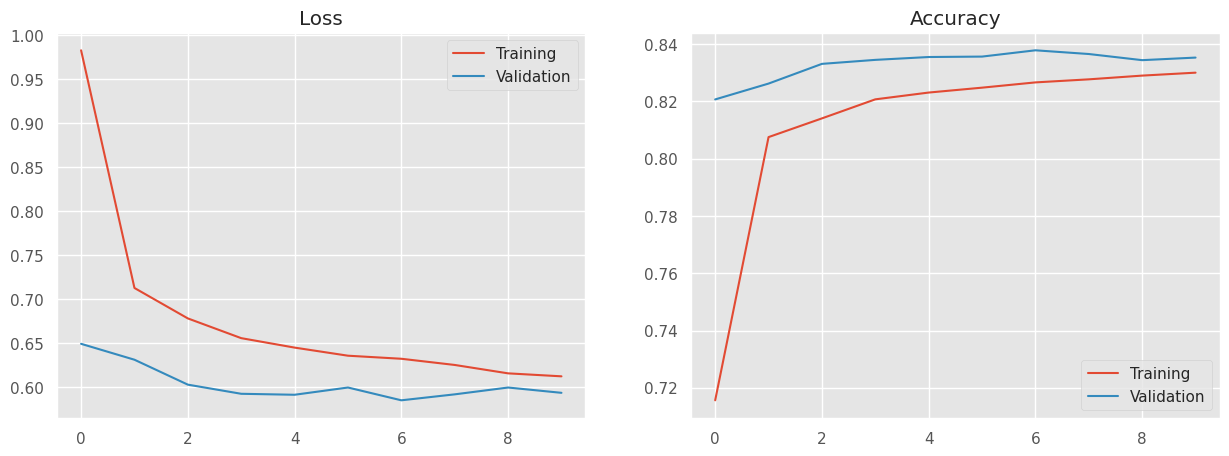

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

In [ ]:
accuracy_rnn = history.history['val_accuracy'][-1]
print('Accuracy Training data: {:.1%}'.format(history.history['accuracy'][-1]))
print('Accuracy Test data: {:.1%}'.format(history.history['val_accuracy'][-1]))
print('Training time: {:.1f}s'.format(training_time_rnn))

Accuracy Training data: 83.0%
Accuracy Test data: 83.5%
Training time: 1448.7s


For this (simple) problem with limited training data, we find that this advanced model has poorer accuracy than the TF-IDF model and takes around ten times longer to train!

This could be a letdown. My conclusion is that a simple problem does not always necessitate a sophisticated solution.

The Linear TF-IDF model was improved by taking word order into account and employing a pre-learned representation of words in the Recurrent Neural Network model with Word2Vec. However, the words we have does not take into account the context in which the term is used. It is reasonable to believe that context is important and this is what the BERT model is attempting to solve.


## Deep Learning - With Bert Language Model

BERT stands for Bidirectional Encoder Representations from Transformers. BERT models aid machines in comprehending and interpreting text. It makes use of the content that comes before it to grasp the context. It also examines the relationships of words inside a sentence to determine the true meaning of words.

BERT will then turn a given sentence into an embedding vector. The embedding vector is used to represent the unique words in a given document. BERT assures that words with the same meaning have a similar representation.

Machine learning does not work with text but performs well with numbers. That is why BERT turns the input text into embedding vectors. The embedding vectors are integers that the model can readily operate with.

Since the BERT model is pre-trained, it comes with a tokenizer. This is why we will use the non-processed training data, and will tokenize the sentences using the uncased Bert tokenizer. As for the RNN model, we will have to map the labels to a one-hot vector.

In [ ]:
# Renaming, Input -> X, Output -> y
X_bert = df['text']
y_bert_class = df['category']

# Convert labels into a one-hot vector of size n (where n is the number of distinct labels)
lab = LabelBinarizer()
lab.fit(y_bert_class)
y_bert = lab.transform(y_bert_class)

# Example (you can modify n)
n=100
print('Coding of labels into a one-hot vector: ' + y_bert_class[n] + ' is ', y_bert[n])

Coding of labels into a one-hot vector: Financials is  [1 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# bert-base-uncased
tokenizer_bert = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
X_bert = [tokenizer_bert(text, padding='max_length', max_length = 512, truncation=True)['input_ids'] for text in X_bert]
X_bert = np.array(X_bert, dtype='int32')

Let's split the data into a training and a test set, and have a look at the format of the data.

In [ ]:
# Train/test split
X_bert_train, X_bert_test, y_bert_train, y_bert_test = train_test_split(X_bert, y_bert, test_size=0.3, random_state=42, stratify=df['category'])
print('Shape of training data: ',X_bert_train.shape)

Shape of training data:  (46820, 512)


Let's define the Bert model using a transformers library pre-trained model. This model will be incorporated into the categorization model as a layer. We shall not train the parameters of this layer by specifying trainable=False.


In [ ]:
from transformers import BertConfig, TFBertModel
config = transformers.BertConfig(dropout=0.2, attention_dropout=0.2)
bbert = transformers.TFBertModel.from_pretrained('bert-base-uncased', config=config, trainable=False)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


You might get a warning message. Don't worry about it. In the context where we apply the model, this message can be ignored.

Let's take a deeper look at the model's output. Let's take a sample from our training dataset (a sample of size n=13) and run it through the model to see what happens.


In [ ]:
# Let's create a sampe of size 13 from the training data
sample = X_bert_train[0:13]
print('Object type: ', type(bbert(sample)))
print('Output format (shape): ',bbert(sample)[0].shape)
print('Output used as input for the classifier (shape): ', bbert(sample)[0][:,0,:].shape)

Object type:  <class 'transformers.modeling_tf_outputs.TFBaseModelOutputWithPoolingAndCrossAttentions'>
Output format (shape):  (13, 512, 768)
Output used as input for the classifier (shape):  (13, 768)


The result is a unique Python object. We get a Tensor of size (N, M, S), where N is the size of the dataset (in our case thirteen examples), M is the length of the sample (number of words in a phrase), and S is the size of the output vector (the model's output). As Devlin et al. remark, for a classification task, we often use the first output vector of a phrase as input for the rest of the classification model, because this initial vector "encodes" information about the total sentence. Alternatively, all output vectors could be pooled and utilised as input for the rest of the classifier.


It's time to start building the classification model! It is made up of the following parts:
- Input layer: to inform the model about the expected input format, so that the model knows what to expect.
- Bert model: to encode the input data into a new vector sequence (BERT output). The rest of the classifier will only utilise the first vector in this sequence as input.
- A dropout layer is used for regularisation.
- Dense layer (with relu activation function and 64 neurons): to solve the classification problem.
- Dense layer (with softmax activation function): for each label's probability distribution


In [ ]:
input_ids_in = layers.Input(shape=(512,), name='input_token', dtype='int32')

x = bbert(input_ids=input_ids_in)[0][:,0,:]
x = layers.Dropout(0.2, name='dropout')(x)
x = layers.Dense(64, activation='relu', name='dense')(x)
x = layers.Dense(13, activation='softmax', name='classification')(x)

bmodel = models.Model(inputs=input_ids_in, outputs = x)

bmodel.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
bmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_token (InputLayer)    [(None, 512)]             0         
                                                                 
 tf_bert_model (TFBertModel)  TFBaseModelOutputWithPoo  109482240
                             lingAndCrossAttentions(l            
                             ast_hidden_state=(None,             
                             512, 768),                          
                              pooler_output=(None, 76            
                             8),                                 
                              past_key_values=None, h            
                             idden_states=None, atten            
                             tions=None, cross_attent            
                             ions=None)                          
                                                           

Let's see if the number of trainable parameters (which are only in the dense layers because BERT is "frozen") makes sense. The vector that emerges from BERT is one vector of size 768 (as defined by the BERT model). Each of these items is coupled to one of the dense layer's 64 neurons, yielding 768x64=49,152 parameters. Each neuron contains an extra parameter, the bias, for a total of 64 parameters. The dense layer's output consists of 64 elements that connect to all five elements of the classification layer, i.e. 64x13. The classification layer contains 5 biases as well.

In total, there are 50,061 trainable parameters: 768x64+64+64*13+13! We've arrived:-)


In [ ]:
# Train the model
start_time = datetime.now()
history = bmodel.fit(X_bert_train, y_bert_train, batch_size=32, shuffle=True, epochs=10, validation_data=(X_bert_test, y_bert_test))
end_time = datetime.now()

training_time_bert = (end_time - start_time).total_seconds()

Epoch 1/10
  14/1464 [..............................] - ETA: 20:41:03 - loss: 2.5562 - accuracy: 0.1027

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
ax[0].set(title='Loss')
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].legend(loc="upper right")

ax[1].set(title='Accuracy')
ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].legend(loc="lower right")

In [ ]:
accuracy_bert = history.history['val_accuracy'][-1]
print('Accuracy Training data: {:.1%}'.format(history.history['accuracy'][-1]))
print('Accuracy Test data: {:.1%}'.format(history.history['val_accuracy'][-1]))
print('Training time: {:.1f}s (or {:.1f} minutes)'.format(training_time_bert, training_time_bert/60))

For this (simple) problem with little training data, we find that this advanced model performs worse than the TF-IDF model and takes more than 2,000 times longer to train!

This could be a letdown. My conclusion, like with the RNN model, is that a simple problem does not always require a sophisticated solution.


## Conclusion

We used three Machine Learning models to classify news into different categories. We began with a "classical" machine learning model, a linear model utilising TF-IDF, and gradually increased the complexity of the models. Then, to exploit pre-learned knowledge, we employed a Recurrent Neutral Network model with word embeddings. Finally, we employed a BERT model, which is a pre-trained model that includes not only single words but also full phrases.
The models utilised are as follows:
- TF-IDF linear model
- Bidirectional LSTM model with word2vec word embedding
- BERT

These models were evaluated using two metrics:
Accuracy - Training Time
Let's take a look at the results:


In [ ]:
method = ['TF-IDF', 'RNN', 'BERT']
accuracy = [accuracy_tfidf, accuracy_rnn, accuracy_bert]
accuracy = [str(round(acc*100, 1))+'%' for acc in accuracy]
training_time = [round(training_time_tfidf,1), round(training_time_rnn,1), round(training_time_bert,1)]
training_time_rounded = [round(tt,1) for tt in training_time]
training_time = np.array(training_time)
training_time_x = list(training_time /min(training_time))
training_time_x = [str(round(ttx,1))+'x' for ttx in training_time_x]

dict = {'Method' : method,
        'Accuracy' : accuracy,
        'Training Time [s]' : training_time_rounded,
        'Training Time [x]' : training_time_x}
df = pd.DataFrame(dict)
display(df)

In [ ]:
bmodel.save('/content/drive/MyDrive/MSc Project/Code/Automatic-Categorization-of-Companies-based-on-their-Names/models/model_tf.h5', save_format='h5')
model_tf2 = models.load_model('/content/drive/MyDrive/MSc Project/Code/Automatic-Categorization-of-Companies-based-on-their-Names/models/model_tf.h5', custom_objects={'TFBertModel': bbert})
model_tf2.summary()

This classification is a straightforward issue. A simple model, such as the linear TF-IDF model, already provides excellent accuracy. Using more sophisticated models does not enhance accuracy, but it takes significantly longer: the RNN model takes 20 times longer than the TF-IDF model. The BERT model requires about 1000 times the duration of the TF-IDF!

My conclusion is that it is not always necessary to utilise sophisticated models when basic ones would suffice!

As an aside, if we don't acquire a satisfying accuracy right away, the Linear TF-IDF technique can be very annoying. It can be difficult to improve the model in such instances. RNN and BERT models are extremely different. Such models are easily improved: either design a more sophisticated model architecture, or run the model on additional epochs,... It's fascinating to see how the accuracy of the BERT model increases with each epoch. The model appears to be reading the text better and better.



These lines load a pre-trained BERT model and tokenizer from the Hugging Face Transformers library. BertForSequenceClassification is a class for sequence classification tasks that uses BERT as the underlying model. num_labels is set to 13, indicating that the model is being trained to classify sequences into one of 13 categories. BertTokenizer is a class for tokenizing text into BERT-compatible input sequences.

In [ ]:
# Load pre-trained BERT model and tokenizer
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=13)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')


These lines extract the description and category columns from a Pandas DataFrame filtered_df and convert them to Python lists. These will be used as the input and target data for the model.

In [ ]:
# Preprocess text data
X = filtered_df['description'].tolist()
y = filtered_df['category'].tolist()

This code tokenizes the input text data using the pre-trained tokenizer. batch_encode_plus tokenizes the input text into BERT-compatible input sequences, pads them to a maximum length of 128, and truncates any sequences that exceed this length. The resulting tokenized data is returned as a PyTorch tensor.

In [ ]:
# Tokenize text data
max_len = 128 # maximum sequence length for BERT
X_tokenized = tokenizer.batch_encode_plus(X, max_length=max_len, padding='max_length', truncation=True, return_tensors='pt')

This code maps each unique label in the target data y to a unique integer, and creates a new list y_encoded that contains the integer labels. The resulting integer label mapping is printed to the console.

In [ ]:
# Convert labels to integers
label_map = {label: i for i, label in enumerate(set(y))}
y_encoded = [label_map[label] for label in y]
print(label_map)

These lines set random seeds for PyTorch, NumPy, and the built-in Python random module to ensure that the results are reproducible.

In [ ]:
# Set random seeds for reproducibility
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
torch.cuda.manual_seed_all(0)
seed = 0
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)


This code creates a TensorDataset object that contains the tokenized input data and target labels. This dataset is split into three subsets: a training set (80% of the data), a validation set (10% of the data), and a test set (10% of the data).

In [ ]:
# Create tensor dataset and split into train, validation, and test sets
dataset = TensorDataset(X_tokenized['input_ids'], X_tokenized['attention_mask'], torch.tensor(y_encoded))
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


Data Loaders Creation: The code first creates three data loaders (train_loader, val_loader, test_loader) for the training, validation, and test datasets. It sets the batch size to 32 and uses a RandomSampler to randomly sample the data at each epoch.

In [ ]:
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, sampler=RandomSampler(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=batch_size, sampler=RandomSampler(val_dataset))
test_loader = DataLoader(test_dataset, batch_size=batch_size, sampler=RandomSampler(test_dataset))


Setting up Training Parameters: The code then sets up the training parameters, including the number of epochs, empty lists to store losses and accuracies for each epoch, and some other variables.

In [ ]:
epochs = 10
train_losses = []
val_losses = []
test_losses = []
train_accs = []
val_accs = []
test_accs = []
best_val_acc = 0.0
best_test_acc = 0.0
accumulation_steps = 8
torch.manual_seed(0)

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
else:
    device = torch.device("cpu")


Moving Model to Device: It moves the model to the device (CPU or GPU) specified in the previous step.

In [ ]:
model.to(device)

Creating Optimizer and Scheduler: The code creates an AdamW optimizer with a learning rate of 2e-5, and sets up a scheduler using get_linear_schedule_with_warmup() that adjusts the learning rate based on the number of training steps.

In [ ]:
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_loader) // accumulation_steps * epochs
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=0, num_training_steps=total_steps)

Training the Model: The code then enters a loop over the epochs and trains the model on the training dataset. In each epoch, it goes through all the batches in the training dataset, computes the loss, backpropagates the gradients, and updates the model parameters. The code also evaluates the model on the validation dataset at the end of each epoch.

Testing the Model: The code also evaluates the model on the test dataset at the end of each epoch.

Saving the Best Model: The code saves the best model based on the validation accuracy.

Plotting the Results: Finally, the code plots the training, validation, and test losses and accuracies using matplotlib.

In [ ]:
# train the model
for epoch in range(epochs):
    model.train()
    train_loss = 0
    for i, batch in enumerate(train_loader):
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs[0]
        train_loss += loss.item()

        if (i + 1) % accumulation_steps == 0 or i == len(train_loader) - 1:
            loss = loss / accumulation_steps
            loss.backward()
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()

        if i % 100 == 0:
          print(f"Epoch {epoch+1}, batch {i+1}: train_loss = {train_loss/(i+1):.4f}")

    model.eval()
    val_loss = 0
    val_preds = []
    val_labels = []
    with torch.no_grad():
        for batch in val_loader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = outputs[0]
            val_loss += loss.mean().item() # convert tensor to numpy array and access scalar value
            preds = torch.argmax(outputs.logits, dim=1)
            val_preds.extend(preds.tolist())
            val_labels.extend(labels.tolist())

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    train_preds = []
    train_labels = []
    for batch in train_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)

        outputs = model(input_ids, attention_mask=attention_mask)
        _, predictions = torch.max(outputs.logits, dim=1)
        train_preds.extend(predictions.tolist())
        train_labels.extend(labels.tolist())

    train_acc = accuracy_score(train_labels, train_preds)
    train_accs.append(train_acc)
    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_acc = accuracy_score(val_labels, val_preds)
    val_accs.append(val_acc)


    print(f'Epoch {epoch + 1}: train_loss = {train_loss:.4f}, train_acc = {train_acc:.4f}, val_loss = {val_loss:.4f}, val_acc = {val_acc:.4f}')

        # Evaluate the model on the test set
    model.eval()
    test_loss = 0
    test_preds = []
    test_labels = []
    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch[0].to(device)
            attention_mask = batch[1].to(device)
            labels = batch[2].to(device)

            outputs = model(input_ids, attention_mask=attention_mask)
            loss = outputs[0] # only take the first element
            test_loss += loss.mean().item() # convert tensor to numpy array and access scalar value
            preds = torch.argmax(outputs.logits, dim=1) # use outputs.logits instead of outputs[1]
            test_preds.extend(preds.tolist())
            test_labels.extend(labels.tolist())

    test_loss /= len(test_loader)
    test_acc = accuracy_score(test_labels, test_preds)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    print(f'Test loss = {test_loss:.4f}, Test accuracy = {test_acc:.4f}')

# Save the best model based on validation accuracy
    if val_acc > best_val_acc:
      best_val_acc = val_acc
      torch.save(model.state_dict(), '/content/drive/MyDrive/MSc Project/Code/Automatic-Categorization-of-Companies-based-on-their-Names/best_model.pt')

print(f'Best validation accuracy: {best_val_acc:.4f}')

plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.plot(test_losses, label='Test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(train_accs, label='Training accuracy')
plt.plot(val_accs, label='Validation accuracy')
plt.plot(test_accs, label='Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the saved model checkpoint
path = "/content/drive/MyDrive/MSc Project/Code/Automatic-Categorization-of-Companies-based-on-their-Names/best_model.pt"
if torch.cuda.is_available():
    state_dict = torch.load(path)
else:
    state_dict = torch.load(path, map_location=torch.device('cpu'))

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define two example texts
text = "VCF pays 100% of what the State of Illinois owes you. A Qualified Purchaser in the State of Illinois' Vendor Payment Program and Vendor Support Initiative."
# text2 = "Koops Overhead Doors specializes in the sales, service, repair, and installation of garage doors and electric garage door openers. Servicing Albany, Troy, Clifton Park, East Greenbush and the surrounding Capital District New York areas"

# Instantiate the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=13)

# Load the model weights
model.load_state_dict(state_dict)
label_map = {'Healthcare': 0, 'Commercial Services & Supplies': 1, 'Transportation & Logistics': 2, 'Materials': 3, 'Corporate Services': 4, 'Information Technology': 5, 'Financials': 6, 'Professional Services': 7, 'Consumer Discretionary': 8, 'Consumer Staples': 9, 'Media, Marketing & Sales': 10, 'Industrials': 11, 'Energy & Utilities': 12}
class_names = list(label_map.keys())
# print(class_names)

# Tokenize the text with padding and truncation enabled
# In this example, the max_length parameter is set to 35, which means the input text will be truncated if it exceeds this length.
# The padding parameter is set to True, which means the input text will be padded with zeros if it is shorter than the maximum length.
inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt", max_length=35)


# Make a prediction
outputs = model(**inputs)

predicted_class = torch.argmax(outputs.logits, dim=1)
predicted_class_name = class_names[predicted_class.item()]
print(predicted_class_name)

# Print the predicted class
print(predicted_class.item())


This Python code uses the PyTorch and Hugging Face's Transformers libraries to perform classification of a given input text based on a pre-trained BERT model. Here's what the code does:

It loads a pre-trained BERT model checkpoint stored at the given path, either on the GPU or CPU, depending on the availability of CUDA.
It loads the tokenizer for the pre-trained BERT model.
It defines an example text.
It instantiates a BERT model for sequence classification with 13 labels.
It loads the weights of the pre-trained BERT model onto the newly instantiated model.
It defines a label map and class names for the classification task.
It tokenizes the example text with padding and truncation enabled and returns a PyTorch tensor.
It feeds the tokenized input to the BERT model and makes a prediction for the input text.
It retrieves the predicted class and class name from the output.
It prints the predicted class and class name.

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification

# Load the saved model checkpoint
path = "/content/drive/MyDrive/MSc Project/Code/Automatic-Categorization-of-Companies-based-on-their-Names/best_model.pt"
if torch.cuda.is_available():
    state_dict = torch.load(path)
else:
    state_dict = torch.load(path, map_location=torch.device('cpu'))

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define example texts
texts = ["VCF pays 100% of what the State of Illinois owes you. A Qualified Purchaser in the State of Illinois' Vendor Payment Program and Vendor Support Initiative.",
         "Koops Overhead Doors specializes in the sales, service, repair, and installation of garage doors and electric garage door openers. Servicing Albany, Troy, Clifton Park, East Greenbush and the surrounding Capital District New York areas"]

# Instantiate the model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=13)

# Load the model weights
model.load_state_dict(state_dict)
label_map = {'Healthcare': 0, 'Commercial Services & Supplies': 1, 'Transportation & Logistics': 2, 'Materials': 3, 'Corporate Services': 4, 'Information Technology': 5, 'Financials': 6, 'Professional Services': 7, 'Consumer Discretionary': 8, 'Consumer Staples': 9, 'Media, Marketing & Sales': 10, 'Industrials': 11, 'Energy & Utilities': 12}
class_names = list(label_map.keys())

# Tokenize the texts with padding and truncation enabled
# In this example, the max_length parameter is set to 35, which means the input texts will be truncated if they exceed this length.
# The padding parameter is set to True, which means the input texts will be padded with zeros if they are shorter than the maximum length.
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors="pt", max_length=35)

# Make a prediction
outputs = model(**inputs)

predicted_classes = torch.argmax(outputs.logits, dim=1)

# Print the predicted classes
for predicted_class in predicted_classes:
    predicted_class_name = class_names[predicted_class.item()]
    print(predicted_class_name)
    print(predicted_class.item())


In this modified code, we define a list of example texts, texts, and tokenize them together using the tokenizer object. The resulting input tensor will have shape (num_texts, max_length), where num_texts is the number of texts and max_length is the maximum length of the tokenized texts after padding and truncation. We then pass this input tensor to the model to make a prediction for each text in the list. Finally, we loop over the predicted classes and print them out along with their corresponding class names.

## References

[1] Mikolov, Tomas, et al. (2013). "Efficient Estimation of Word Representations in Vector Space"

[2] Srivastava, Hinton et al. (2014). "Dropout: A Simple Way to Prevent Neural Networks from Overfitting"

[3] Devlin et al. (2019). "BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding"